In [1]:
import pandas as pd
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pickle

In [2]:
# loading the dataset

load_path = r"./data/2_end.xlsx"

original_data = pd.read_excel(load_path)
original_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,year,trade_deficit
0,-5.172124,-2.536326,-0.834113,-1.640317,-0.592026,0.251868,0.246394,0.400435,2003,-712.331648
1,-4.742889,-1.939355,0.098362,-0.640517,-0.193529,0.192906,0.196797,0.134472,2004,-851.752241
2,-4.247102,-1.549189,1.162257,0.314997,-0.434844,0.322667,-0.014610,-0.374990,2005,-953.674088
3,-3.797104,-1.976449,1.641982,1.040651,-0.157995,-0.017380,-0.138757,-0.469669,2006,-888.751877
4,-3.280124,0.461735,1.913504,1.794532,-0.436049,-0.400013,0.421421,0.127655,2007,-781.766393


In [3]:
y = original_data['trade_deficit']
X = original_data.drop('trade_deficit', axis=1)

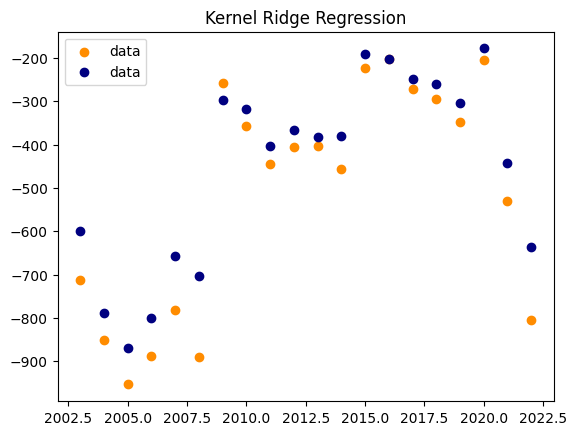


R-squared: 0.8968045584315861


In [4]:
# Define the kernel ridge regression model
clf = KernelRidge(alpha=0.3, kernel='rbf')

# Fit the model
clf.fit(X, y)
yhat = clf.predict(X)

# Plot results
plt.scatter(original_data['year'], y, color='darkorange', label='data')
plt.scatter(original_data['year'], yhat, color='navy', label='data')
plt.legend()
plt.title("Kernel Ridge Regression")
plt.show()

r2 = r2_score(y, yhat)
print("\nR-squared:", r2)

C:\P311\Lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


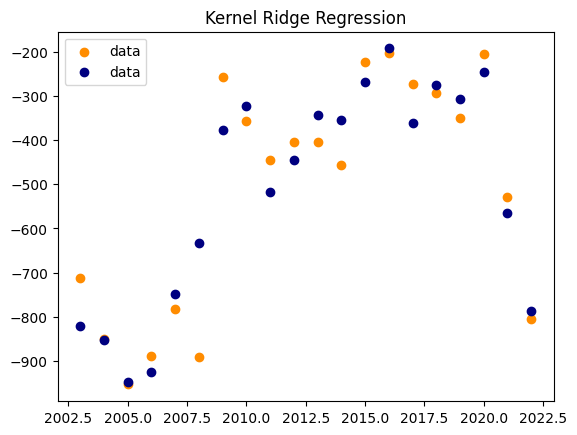


R-squared: 0.8996175333107141


In [5]:
# Define the kernel ridge regression model
clf = KernelRidge(alpha=0, kernel='poly', degree=1)

# Fit the model
clf.fit(X, y)
yhat = clf.predict(X)

# Plot results
plt.scatter(original_data['year'], y, color='darkorange', label='data')
plt.scatter(original_data['year'], yhat, color='navy', label='data')
plt.legend()
plt.title("Kernel Ridge Regression")
plt.show()

r2 = r2_score(y, yhat)
print("\nR-squared:", r2)

In [6]:
dictionary_save_path = r"./models/inference.pkl"

with open(dictionary_save_path, 'wb') as f:
    pickle.dump(clf, f)